## um número de amostras Nmax fixo, definido(lido da tela) pelo usuá´rio no início do processo;

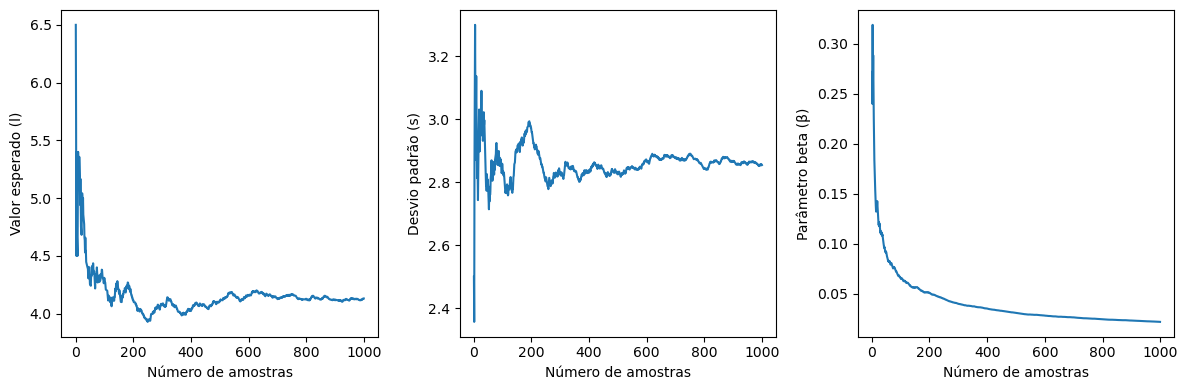

In [4]:
import math
import random
import matplotlib.pyplot as plt

class MonteCarloSimulation:
    def __init__(self, f, D, beta_threshold):
        self.f = f
        self.D = D
        self.beta_threshold = beta_threshold
        self.N = 0
        self.sigma = 0
        self.sigma_squared = 0
        self.l_values = []
        self.s_values = []
        self.beta_values = []

    def run(self, Nmax):
        while self.N < Nmax:
            self.N += 1
            x = random.choices(list(self.f.keys()), list(self.f.values()))[0]
            D_x = self.D(x)

            self.sigma += D_x
            self.sigma_squared += D_x ** 2

            if self.N > 1:
                l = self.sigma / self.N
                variance = (self.sigma_squared / self.N) - (l ** 2)
                s = math.sqrt(variance)
                beta = (s / l) / math.sqrt(self.N)

                self.l_values.append(l)
                self.s_values.append(s)
                self.beta_values.append(beta)

                if beta < self.beta_threshold:
                    break

    def plot_results(self):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.plot(range(1, self.N), self.l_values)
        plt.xlabel("Número de amostras")
        plt.ylabel("Valor esperado (l)")

        plt.subplot(1, 3, 2)
        plt.plot(range(1, self.N), self.s_values)
        plt.xlabel("Número de amostras")
        plt.ylabel("Desvio padrão (s)")

        plt.subplot(1, 3, 3)
        plt.plot(range(1, self.N), self.beta_values)
        plt.xlabel("Número de amostras")
        plt.ylabel("Parâmetro beta (β)")

        plt.tight_layout()
        plt.show()

# Exemplo de uso
# Função de distribuição de probabilidade
f = {
    1: 0.3,
    2: 0.5,
    3: 0.2
}

# Função de desempenho
def D(x):
    return x ** 2

# Tolerância beta
beta_threshold = float(input("Digite a tolerância beta: "))
# Número de amostras
Nmax = int(input("Digite o número máximo de amostras: "))

simulation = MonteCarloSimulation(f, D, beta_threshold)
simulation.run(Nmax)
simulation.plot_results()


## tantos sorteios quanto necessário, até que o parâmetro β seja inferior a uma tolerâncias β, definida(lida da tela) pelo usu ́ario no início do processo;

In [7]:
import math
import random

class MonteCarloSimulation:
    def __init__(self, f, D, beta_threshold):
        self.f = f
        self.D = D
        self.beta_threshold = beta_threshold
        self.N = 0
        self.sigma = 0
        self.sigma_squared = 0

    def run(self):
        while True:
            self.N += 1
            x = random.choices(list(self.f.keys()), list(self.f.values()))[0]
            D_x = self.D(x)

            self.sigma += D_x
            self.sigma_squared += D_x ** 2

            if self.N > 1:
                l = self.sigma / self.N
                variance = (self.sigma_squared / self.N) - (l ** 2)
                s = math.sqrt(variance)
                beta = (s / l) / math.sqrt(self.N)

                if beta < self.beta_threshold:
                    return l, s, beta

    def run_with_tolerance(self, beta_tolerance):
        self.beta_threshold = beta_tolerance
        return self.run()

# Exemplo de uso
# Função de distribuição de probabilidade
f = {
    1: 0.3,
    2: 0.5,
    3: 0.2
}

# Função de desempenho
def D(x):
    return x ** 2

# Tolerância beta
beta_tolerance = float(input("Digite a tolerância beta: "))

simulation = MonteCarloSimulation(f, D, beta_tolerance)
l, s, beta = simulation.run_with_tolerance(beta_tolerance)

print("Valor esperado (l):", l)
print("Desvio padrão (s):", s)
print("Parâmetro beta (β):", beta)


Valor esperado (l): 4.046801872074883
Desvio padrão (s): 2.7102958326586637
Parâmetro beta (β): 0.009998312815553441
